# New section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
import prophet
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Data = pd.read_csv('/content/sample_data/Oxford_Data.csv')
columns_to_remove = ['sun']
Data = Data.drop(columns=columns_to_remove)
Data.dtypes

yyyy    float64
mm      float64
tmax     object
tmin     object
af       object
rain     object
dtype: object

In [ ]:
Data['yyyy'] = pd.to_numeric(Data['yyyy'], errors='coerce').astype('Int64').astype(str)
Data['mm'] = pd.to_numeric(Data['mm'], errors='coerce').astype('Int64').astype(str)
Data['tmax'] = pd.to_numeric(Data['tmax'], errors='coerce')
Data['tmin'] = pd.to_numeric(Data['tmin'], errors='coerce')
Data['af'] = pd.to_numeric(Data['af'], errors='coerce')
Data['rain'] = pd.to_numeric(Data['rain'], errors='coerce')

Data.dtypes
Data["tmin"].fillna( method ='ffill', inplace = True)
Data["af"].fillna( method ='ffill', inplace = True)
Data["tavg"].fillna( method ='ffill', inplace = True)
Data.apply(pd.isnull).sum() # missing values

yyyy    0
mm      0
tmax    0
tmin    0
af      0
rain    0
tavg    0
day     0
date    0
dtype: int64

In [ ]:
Data = Data.drop(index = Data.index[0])
Data.apply(pd.isnull).sum() # missing values
Data['tavg'] = (Data['tmax']+Data['tmin'])/2
Data["day"] = "01"
Data["date"] = (Data["yyyy"].str.cat(Data["mm"], sep ="-")).str.cat(Data["day"], sep = "-")
Data

,yyyy,mm,tmax,tmin,af,rain,tavg,day,date
2,1853,2,3.2,-1.8,19.0,29.3,0.70,01,1853-2-01
3,1853,3,7.7,-0.6,20.0,25.9,3.55,01,1853-3-01
4,1853,4,12.6,4.5,0.0,60.1,8.55,01,1853-4-01
5,1853,5,16.8,6.1,0.0,59.5,11.45,01,1853-5-01
6,1853,6,20.1,10.7,0.0,82.0,15.40,01,1853-6-01
...,...,...,...,...,...,...,...,...,...
2043,2023,3,10.6,4.5,9.0,4.9,7.55,01,2023-3-01
2044,2023,4,13.7,5.1,1.0,65.9,9.40,01,2023-4-01
2045,2023,5,18.3,5.1,0.0,51.2,11.70,01,2023-5-01
2046,2023,6,23.8,12.1,0.0,40.5,17.95,01,2023-6-01


In [ ]:
data = Data.rename(columns = {"date": "ds",
                                       "tmax": "y"})
print(data)

      yyyy mm     y  tmin    af  rain   tavg day         ds
2     1853  2   3.2  -1.8  19.0  29.3   0.70  01  1853-2-01
3     1853  3   7.7  -0.6  20.0  25.9   3.55  01  1853-3-01
4     1853  4  12.6   4.5   0.0  60.1   8.55  01  1853-4-01
5     1853  5  16.8   6.1   0.0  59.5  11.45  01  1853-5-01
6     1853  6  20.1  10.7   0.0  82.0  15.40  01  1853-6-01
...    ... ..   ...   ...   ...   ...    ...  ..        ...
2043  2023  3  10.6   4.5   9.0   4.9   7.55  01  2023-3-01
2044  2023  4  13.7   5.1   1.0  65.9   9.40  01  2023-4-01
2045  2023  5  18.3   5.1   0.0  51.2  11.70  01  2023-5-01
2046  2023  6  23.8  12.1   0.0  40.5  17.95  01  2023-6-01
2047  2023  7  21.5  12.1   0.0  99.9  16.80  01  2023-7-01

[2046 rows x 9 columns]


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ba1gg0e/sj1ny0yz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ba1gg0e/k3lr_yyn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39975', 'data', 'file=/tmp/tmp7ba1gg0e/sj1ny0yz.json', 'init=/tmp/tmp7ba1gg0e/k3lr_yyn.json', 'output', 'file=/tmp/tmp7ba1gg0e/prophet_modelh_r0qkcd/prophet_model-20230821090418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:04:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:04:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


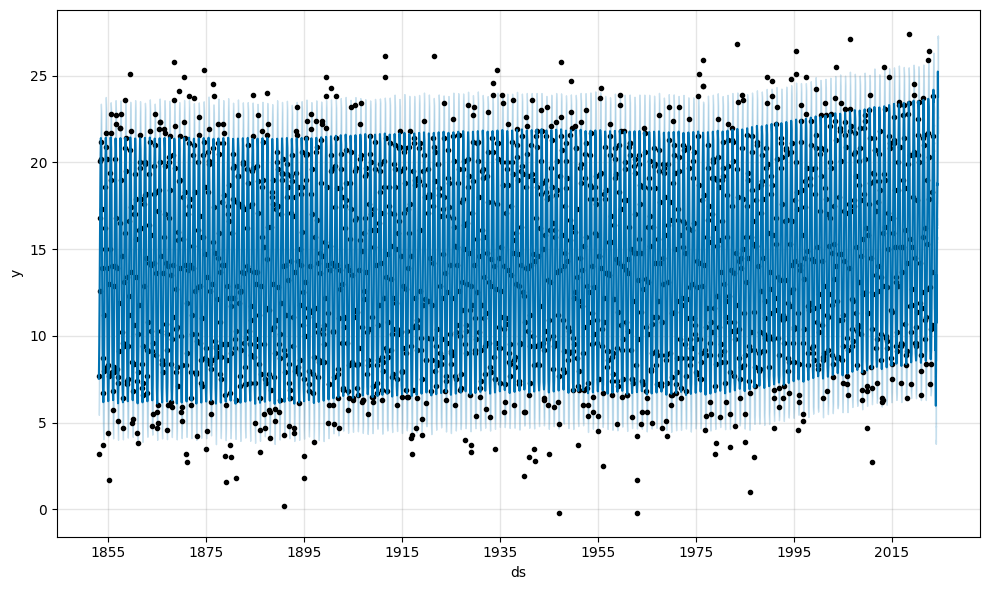

In [ ]:
a = model.plot(predictions)

In [ ]:
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1853-02-01,13.528284,5.444405,9.679403,13.528284,13.528284,-6.001335,-6.001335,-6.001335,-6.001335,-6.001335,-6.001335,0.0,0.0,0.0,7.526949
1,1853-03-01,13.528206,7.262143,11.608518,13.528206,13.528206,-4.055812,-4.055812,-4.055812,-4.055812,-4.055812,-4.055812,0.0,0.0,0.0,9.472394
2,1853-04-01,13.528119,10.942980,15.234026,13.528119,13.528119,-0.510034,-0.510034,-0.510034,-0.510034,-0.510034,-0.510034,0.0,0.0,0.0,13.018086
3,1853-05-01,13.528035,14.380337,18.644379,13.528035,13.528035,2.899238,2.899238,2.899238,2.899238,2.899238,2.899238,0.0,0.0,0.0,16.427274
4,1853-06-01,13.527949,17.697585,21.795115,13.527949,13.527949,6.340521,6.340521,6.340521,6.340521,6.340521,6.340521,0.0,0.0,0.0,19.868470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406,2024-06-26,15.776145,22.195090,26.275544,15.776145,15.776145,8.529334,8.529334,8.529334,8.529334,8.529334,8.529334,0.0,0.0,0.0,24.305479
2407,2024-06-27,15.776269,22.112020,26.116515,15.776269,15.776269,8.390793,8.390793,8.390793,8.390793,8.390793,8.390793,0.0,0.0,0.0,24.167062
2408,2024-06-28,15.776393,21.985669,26.103982,15.776393,15.776393,8.258853,8.258853,8.258853,8.258853,8.258853,8.258853,0.0,0.0,0.0,24.035246
2409,2024-06-29,15.776517,21.777392,26.030024,15.776517,15.776517,8.136672,8.136672,8.136672,8.136672,8.136672,8.136672,0.0,0.0,0.0,23.913189


In [ ]:
plot_plotly(model, predictions)